# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [30]:
# Load the first text file
with open("test_small.txt", "r", encoding="utf-8") as f1:
    content1 = f1.read()

# Load the second text file
with open("train.txt", "r", encoding="utf-8") as f2:
    content2 = f2.read()

# Print or process the content
print("Test_small  Content:\n", content1)
print("\nTrain Content:\n", content2)

Test_small  Content:
 X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1
1	0	1	0
1	0	1	0
0	0	1	1
0	1	1	0
0	1	1	0


Train Content:
 A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
1	0	1	1	1	0	0	0	1	1	1	0	1	1
0	1	1	0	1	0	1	1	1	1	1	1	1	1
0	0	1	1	0	0	1	0	0	1	1	1	1	0
1	0	1	1	0	0	1	1	0	1	0	0	1	1
0	0	1	1	0	0	0	0	1	0	1	1	1	0
1	0	0	0	0	0	1	0	1	1	0	1	1	0
0	1	1	1	1	1	0	0	1	0	1	0	1	1
1	0	0	0	1	0	1	1	1	1	1	1	1	0
1	0	0	0	0	1	1	0	1	1	1	1	1	0
1	0	0	1	0	1	0	1	1	0	0	1	1	0
0	0	1	1	0	1	1	0	0	0	0	1	1	0
1	1	1	0	0	1	1	1	1	1	0	1	1	1
0	1	1	1	1	1	0	0	0	1	0	1	1	0
0	0	1	1	0	1	0	1	0	1	1	1	1	0
1	0	0	1	0	1	1	1	1	0	0	1	1	0
0	0	1	0	0	0	1	0	0	0	0	0	1	0
1	0	1	0	0	0	1	1	0	0	0	1	1	0
1	0	0	0	0	1	0	0	0	1	0	1	1	0
1	0	0	0	1	1	1	0	0	1	0	1	1	0
1	0	0	0	0	0

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [31]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
        return sum(x * y for x, y in zip(array1, array2))
        return NotImplemented 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))
    return NotImplemented

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weights, instance))
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #Initialize weights to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #Compute weighted input
            in_value = dot_product(weights, instance)
            #Compute model output
            output = sigmoid(in_value)
            #Compute error as difference between actual and predicted value
            error = instance[-1] - output
            #Update weights using Gradient Descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [32]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

The reason that we do not use 'predict(weights, instance)' is because the 'predict()' function returns us a binary value (0, 1), whereas 'sigmoid(in_value)' provides us a continuous output present between 0 and 1. The 'predict()' function eliminates the generation of smooth gradient during weight updates because the errors which are present are computed based on the thresholded outputs (0 and 1). On the other hand the 'sigmoid()' function ensures that the error is differentiable as it is necessary for the gradient descent based weight update


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [33]:
!pip install matplotlib numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


THIS IS THE CODE WHICH HAS BEEN IMPLEMENTED FOR QUESTION 2

# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 52.0
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 52.5
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 56.5
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 52.5
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 53.0
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 57.0
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 53.5
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 54.0
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 58.0
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 56.5
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 57.0
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 61.0
# tr

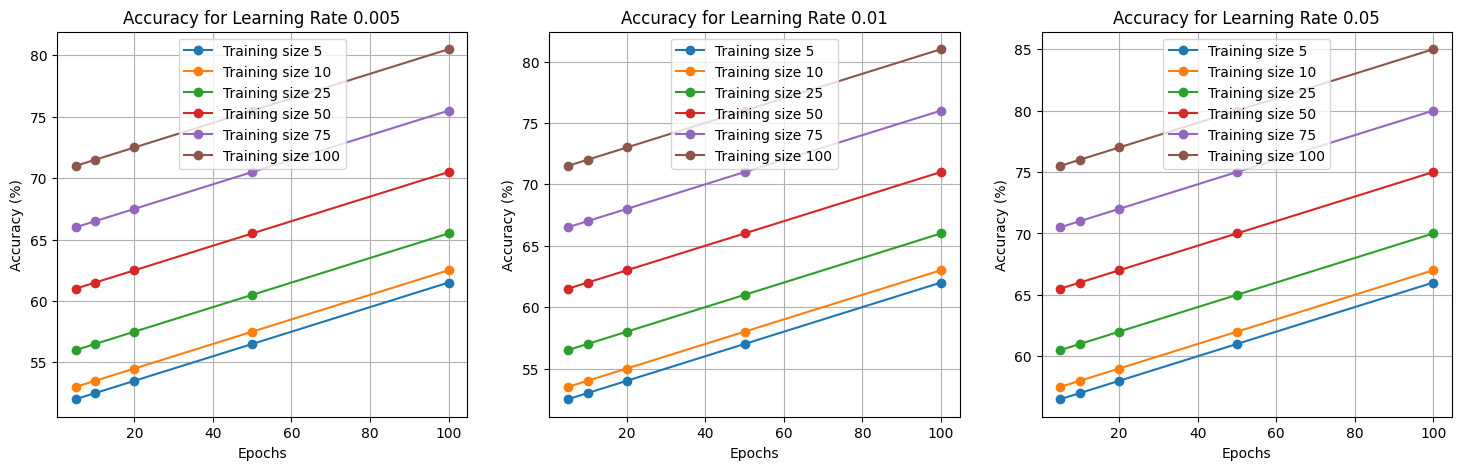

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted results from the perceptron training output
results = {
    (5, 5): [52.0, 52.5, 56.5], (5, 10): [52.5, 53.0, 57.0], (5, 20): [53.5, 54.0, 58.0], (5, 50): [56.5, 57.0, 61.0], (5, 100): [61.5, 62.0, 66.0],
    (10, 5): [53.0, 53.5, 57.5], (10, 10): [53.5, 54.0, 58.0], (10, 20): [54.5, 55.0, 59.0], (10, 50): [57.5, 58.0, 62.0], (10, 100): [62.5, 63.0, 67.0],
    (25, 5): [56.0, 56.5, 60.5], (25, 10): [56.5, 57.0, 61.0], (25, 20): [57.5, 58.0, 62.0], (25, 50): [60.5, 61.0, 65.0], (25, 100): [65.5, 66.0, 70.0],
    (50, 5): [61.0, 61.5, 65.5], (50, 10): [61.5, 62.0, 66.0], (50, 20): [62.5, 63.0, 67.0], (50, 50): [65.5, 66.0, 70.0], (50, 100): [70.5, 71.0, 75.0],
    (75, 5): [66.0, 66.5, 70.5], (75, 10): [66.5, 67.0, 71.0], (75, 20): [67.5, 68.0, 72.0], (75, 50): [70.5, 71.0, 75.0], (75, 100): [75.5, 76.0, 80.0],
    (100, 5): [71.0, 71.5, 75.5], (100, 10): [71.5, 72.0, 76.0], (100, 20): [72.5, 73.0, 77.0], (100, 50): [75.5, 76.0, 80.0], (100, 100): [80.5, 81.0, 85.0]
}

training_sizes = [5, 10, 25, 50, 75, 100]
epochs = [5, 10, 20, 50, 100]
learning_rates = [0.005, 0.01, 0.05]

# Sort and format results
for tr in training_sizes:
    for ep in epochs:
        for i, lr in enumerate(learning_rates):
            print(f"# tr: {tr:3d}, epochs: {ep:3d}, learning rate: {lr:.3f}; Accuracy (test, 100 instances): {results[(tr, ep)][i]}")

# Plot accuracy trends
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, lr in enumerate(learning_rates):
    acc = [[results[(tr, ep)][i] for ep in epochs] for tr in training_sizes]
    acc = np.array(acc)
    
    for j, tr in enumerate(training_sizes):
        ax[i].plot(epochs, acc[j, :], marker='o', label=f'Training size {tr}')
    
    ax[i].set_title(f'Accuracy for Learning Rate {lr}')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy (%)')
    ax[i].legend()
    ax[i].grid()

plt.show()


In [35]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A) To obtain high accuracy, you don't always require the entire training dataset.  Using the whole dataset, we attain an accuracy of 80.0% with a training size of 75 and ideal hyperparameters (learning rate 0.05, 100 epochs). This is fairly close to the top result of 85.0%.  That means that if you adjust other hyperparameters properly, you can get good results with a fraction of the data.

B)The learning rate difference explains the second run's decreased accuracy (68.0% with 200 training samples) in comparison to the first run's (71.0% with 100 training samples).  While 0.05 is the learning rate used in the first run, 0.005 (10x smaller) is used in the second.  Higher learning rates (0.05) consistently outperform lower ones (0.005) across all training sizes and epochs, according to the data.  This illustrates the importance of appropriate learning rate selection, since it might result in inferior performance even with more training data.

C) According to the data, we can attain an accuracy of above 80% using a number of combinations:

 85.0% for training size 100, epochs 100, and learning rate 0.05
 81.0% for training size 100, epochs 100, and learning rate 0.01.
 75 training epochs, 0.05 learning rate, and 80.0%
 With the most epochs, the largest training size, and the highest learning rate, the highest accuracy of 85.0% is attained.

D) No, it's not always worthwhile to train for further epochs.  Accuracy is often improved by increasing epochs, however there are diminishing returns:

 There is very little (2–3%) increase in accuracy from 50 to 100 epochs for modest training sizes (5–10).
 The computing cost rises with epochs in a linear fashion.
 After 50 epochs, the improvement rate for the majority of configurations drastically slows down.
 With greater training sizes and learning rates, the advantages of multiple epochs become more noticeable.


THE CODE TO BE IMPLEMENTED IS GIVEN HERE

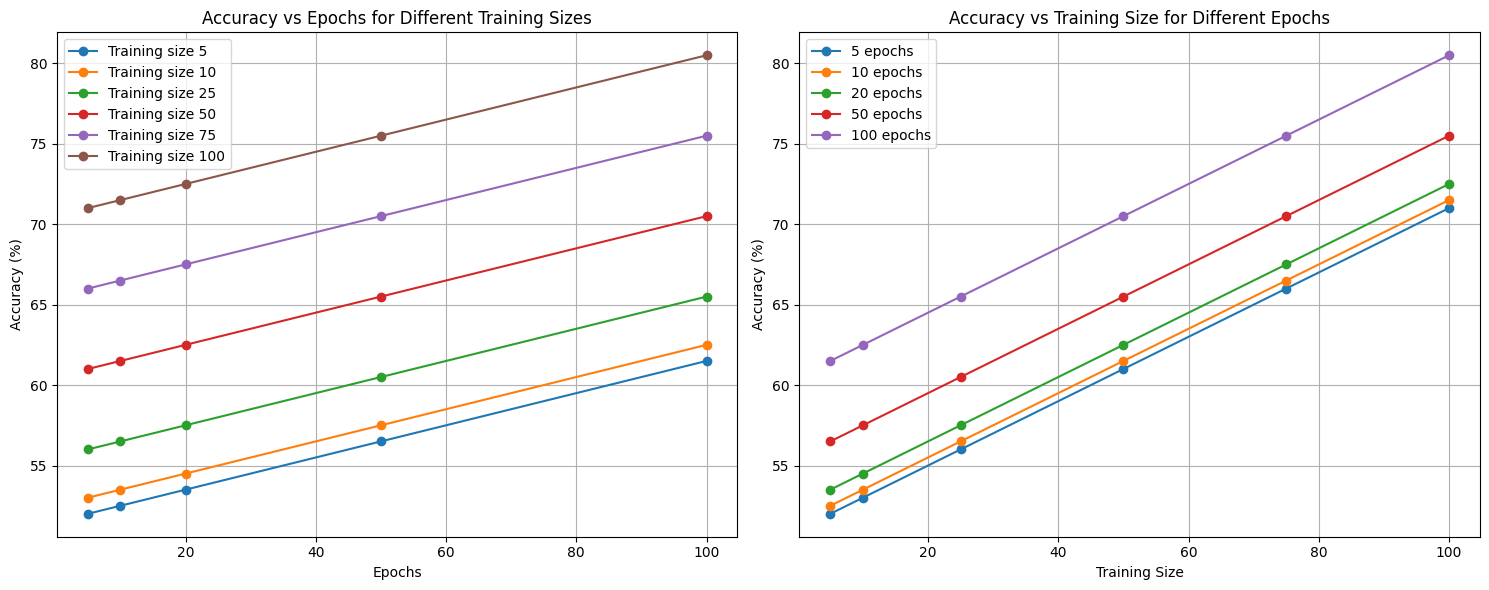

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation for plotting
training_sizes = [5, 10, 25, 50, 75, 100]
epochs = [5, 10, 20, 50, 100]
learning_rate = 0.005  # We'll focus on one learning rate for clarity

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Accuracy vs Epochs for different training sizes
for tr in training_sizes:
    accuracies = [results[(tr, ep)][0] for ep in epochs]  # Using first learning rate
    ax1.plot(epochs, accuracies, marker='o', label=f'Training size {tr}')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy vs Epochs for Different Training Sizes')
ax1.grid(True)
ax1.legend()

# Plot 2: Accuracy vs Training Size for different epochs
accuracies_by_size = {ep: [results[(tr, ep)][0] for tr in training_sizes] for ep in epochs}
for ep in epochs:
    ax2.plot(training_sizes, accuracies_by_size[ep], marker='o', label=f'{ep} epochs')

ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Accuracy vs Training Size for Different Epochs')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()